In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split,cross_validate


In [77]:
df=pd.read_csv("spam_data.csv")
df

,label,message
0,spam,Earn money from home easily. Join today!
1,spam,Exclusive rewards available. Register now!
2,ham,Did you finish your homework?
3,ham,Happy Birthday! Have a wonderful day!
4,ham,Good morning! Have a nice day.
...,...,...
495,ham,I’ll call you once I reach home.
496,spam,"You’ve won a lottery of ₹1,00,000. Contact us ..."
497,ham,Let’s meet at 6 near the mall.
498,ham,Good morning! Have a nice day.


In [78]:
X=df["message"]
y=df["label"]
y

0      spam
1      spam
2       ham
3       ham
4       ham
       ... 
495     ham
496    spam
497     ham
498     ham
499    spam
Name: label, Length: 500, dtype: object

In [79]:
vector=CountVectorizer()
x_vector=vector.fit_transform(X)
x_vector

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3335 stored elements and shape (500, 174)>

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x_vector,y,test_size=0.2,random_state=42)

In [81]:
model=MultinomialNB()
model.fit(x_train,y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [82]:
cross=cross_validate(model,x_vector,y,cv=5,return_train_score=True)
cross

{'fit_time': array([0.0067687 , 0.00409961, 0.00339437, 0.0030973 , 0.00325418]),
 'score_time': array([0.00203133, 0.00165582, 0.00140309, 0.00123668, 0.00131893]),
 'test_score': array([1., 1., 1., 1., 1.]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [83]:
y_pred=model.predict(x_test)
y_pred

array(['spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham', 'ham',
       'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam',
       'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham',
       'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham',
       'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
       'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam',
       'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham'], dtype='<U4')

In [84]:
accuracy=accuracy_score(y_test,y_pred)
print(f"accuracy:{accuracy*100:.2f}%")
classi=classification_report(y_test,y_pred)
print(classi)

accuracy:100.00%
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00        68
        spam       1.00      1.00      1.00        32

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [85]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[68,  0],
       [ 0, 32]])

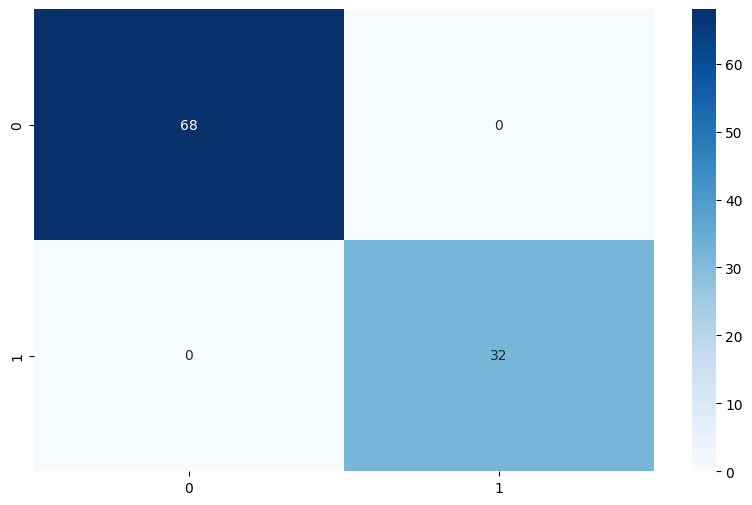

In [86]:
plt.figure(figsize=[10,6])
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d")
plt.show()

In [88]:
message=["Earn money from home easily. Join today!"]
vas=vector.transform(message)
pre=model.predict(vas)
pre

array(['spam'], dtype='<U4')